# Your Title Here

**Name(s)**: (Dawson Tam, Chi-en Kao)

**Website Link**: https://samuelkao.github.io/Power-Outage-Research/

In [1]:
import pandas as pd
import numpy as np
import plotly.io as pio
from scipy.stats import ks_2samp
import seaborn as sns

from pathlib import Path
import matplotlib.pyplot as plt

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

My partner and I are planning to conduct analysis on the outages dataset. It seems the most relevant and has real world applications; thus, we believe the power outages dataset to be the most appealing.

There are various questions that we can explore when it comes to this dataset. Here are a few of them.

-Which factors most heavily contribute to increasing the duration of a power outage?

-Do different regions/states have different distributions in the number of power outages that they experience?

-Has there been an increase in the number of power outages across the United States due to the increase of rapid urbanization?

## Step 2: Data Cleaning and Exploratory Data Analysis

In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("outage.csv")

# Make a copy of the DataFrame

# Slice the DataFrame starting from row 6 (index 5)
outages = df.iloc[6:].copy()  # Ensure a copy is made

# Use the row at index 4 as column names
column_names = list(df.iloc[4].values)

# Rename columns for better understanding
outages.rename(columns=dict(zip(outages.columns, column_names)), inplace=True)

# Drop the 'variables' column
outages.drop(columns='variables', inplace=True)

# Now modifications are applied to the original DataFrame 'outages1' without raising the warning


In [3]:
#lets check what columns we have to work with
outages.columns

Index(['OBS', 'YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
       'OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE',
       'OUTAGE.RESTORATION.TIME', 'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL',
       'HURRICANE.NAMES', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW',
       'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE', 'IND.PRICE',
       'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES', 'TOTAL.SALES',
       'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'RES.CUSTOMERS',
       'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS', 'RES.CUST.PCT',
       'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE', 'PC.REALGSP.USA',
       'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP', 'TOTAL.REALGSP',
       'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION', 'POPPCT_URBAN',
       'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC', 'POPDEN_RURAL',
       'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND', 'PCT_WATER_TOT',
    

In [4]:
#CHECK OUT WHICH COLUMNS HAVE MISSING VALUES
columns_with_na = outages.columns[outages.isna().any()].tolist()
columns_with_na

['MONTH',
 'CLIMATE.REGION',
 'ANOMALY.LEVEL',
 'CLIMATE.CATEGORY',
 'OUTAGE.START.DATE',
 'OUTAGE.START.TIME',
 'OUTAGE.RESTORATION.DATE',
 'OUTAGE.RESTORATION.TIME',
 'CAUSE.CATEGORY.DETAIL',
 'HURRICANE.NAMES',
 'OUTAGE.DURATION',
 'DEMAND.LOSS.MW',
 'CUSTOMERS.AFFECTED',
 'RES.PRICE',
 'COM.PRICE',
 'IND.PRICE',
 'TOTAL.PRICE',
 'RES.SALES',
 'COM.SALES',
 'IND.SALES',
 'TOTAL.SALES',
 'RES.PERCEN',
 'COM.PERCEN',
 'IND.PERCEN',
 'POPDEN_UC',
 'POPDEN_RURAL']

There are a couple of columns that we don't need. Because we are ultimately trying to predict which variables are going to be the most efffective at determining how long outages last for, we might not need columns such as "OUTAGE.RESTORATION.DATE"."OUTAGE.RESTORATION.TIME", "RES.PRICE".etc. 

In [5]:
#lets take out some of those unecessary columsn
outages.drop(columns = "OUTAGE.RESTORATION.DATE", inplace = True)


In [6]:
outages.drop(columns = "OUTAGE.RESTORATION.TIME", inplace = True)
outages

,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
6,1,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,"Friday, July 1, 2011",...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
7,2,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,"Sunday, May 11, 2014",...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
8,3,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,"Tuesday, October 26, 2010",...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
9,4,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,"Tuesday, June 19, 2012",...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
10,5,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,"Saturday, July 18, 2015",...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,"Tuesday, December 6, 2011",...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.59964921,2.401765255,2.401765255
1536,1531,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.59964921,2.401765255,2.401765255
1537,1532,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,"Saturday, August 29, 2009",...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.30774418,1.692255822,1.692255822
1538,1533,2009,8,South Dakota,SD,MRO,West North Central,0.5,warm,"Saturday, August 29, 2009",...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.30774418,1.692255822,1.692255822


In [7]:
#drop the first columns too
outages = outages.iloc[:,1:]
outages

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
6,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,"Friday, July 1, 2011",5:00:00 PM,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
7,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,"Sunday, May 11, 2014",6:38:00 PM,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
8,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,"Tuesday, October 26, 2010",8:00:00 PM,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
9,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,"Tuesday, June 19, 2012",4:30:00 AM,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
10,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,"Saturday, July 18, 2015",2:00:00 AM,...,73.27,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,"Tuesday, December 6, 2011",8:00:00 AM,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.59964921,2.401765255,2.401765255
1536,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.59964921,2.401765255,2.401765255
1537,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,"Saturday, August 29, 2009",10:54:00 PM,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.30774418,1.692255822,1.692255822
1538,2009,8,South Dakota,SD,MRO,West North Central,0.5,warm,"Saturday, August 29, 2009",11:00:00 AM,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.30774418,1.692255822,1.692255822


In [8]:

outages1 = outages.copy()

# Fill missing values in 'OUTAGE.DURATION' column with string '0' in the copy
outages1["OUTAGE.DURATION"].fillna("0", inplace=True)

# Convert the values in 'OUTAGE.DURATION' column to int in the copy
outages1["OUTAGE.DURATION"] = outages1["OUTAGE.DURATION"].astype(int)

In [9]:
#impute all 0 to the mean of outage_duration
outages1["OUTAGE.DURATION"] = outages1["OUTAGE.DURATION"].replace(0, np.nan)
average_outage_duration = outages1["OUTAGE.DURATION"].mean()
outages1["OUTAGE.DURATION"].fillna(average_outage_duration, inplace = True)
outages1["OUTAGE.DURATION"]

6       3060.000000
7          1.000000
8       3000.000000
9       2550.000000
10      1740.000000
           ...     
1535     720.000000
1536    2771.879828
1537      59.000000
1538     181.000000
1539    2771.879828
Name: OUTAGE.DURATION, Length: 1534, dtype: float64

In [10]:
import plotly.express as px

In [11]:
#rename because the periods are not helpful
outages1.rename(columns = {"OUTAGE.DURATION":"OUTAGE_DURATION"}, inplace = True)
outages1["OUTAGE_DURATION"]

6       3060.000000
7          1.000000
8       3000.000000
9       2550.000000
10      1740.000000
           ...     
1535     720.000000
1536    2771.879828
1537      59.000000
1538     181.000000
1539    2771.879828
Name: OUTAGE_DURATION, Length: 1534, dtype: float64

The right-skewed shape of the outage duration histogram indicates that there are fewer occurrences of longer outage durations compared to shorter ones. This suggests that the majority of outages tend to be shorter in duration, with only a small proportion of outages lasting for an extended period.

In [70]:
import matplotlib.pyplot as plt

outages1['CUSTOMERS.AFFECTED'] = outages1['CUSTOMERS.AFFECTED'].astype(float)
fig = go.Figure()

# Add histogram trace
fig.add_trace(go.Histogram(x=outages1['CUSTOMERS.AFFECTED'], marker_color='lightgreen', 
                            marker_line_color='black', marker_line_width=1))

# Update layout
fig.update_layout(
    title="Distribution of Customers Affected by Outages",
    xaxis_title="Number of Customers Affected",
    yaxis_title="Frequency",
    bargap=0.05,  # gap between bars of adjacent location coordinates
    plot_bgcolor='rgba(0,0,0,0)'  # transparent background
)

# Save the plot as HTML to a file
fig.write_html('assets/Distribution-Customers_Affected.html', include_plotlyjs='cdn')

plt.show()

In [14]:
outages1['CUSTOMERS.AFFECTED']


6        70000.0
7            NaN
8        70000.0
9        68200.0
10      250000.0
          ...   
1535     34500.0
1536         NaN
1537         NaN
1538         NaN
1539     14273.0
Name: CUSTOMERS.AFFECTED, Length: 1534, dtype: float64

In [72]:
fig = go.Figure()

# Iterate through each category of 'CLIMATE.REGION' and add box traces
for region in outages1['CLIMATE.REGION'].unique():
    fig.add_trace(go.Box(y=outages1[outages1['CLIMATE.REGION'] == region]['OUTAGE_DURATION'], name=region))

# Update layout
fig.update_layout(
    title="Distribution of Outage Duration across Climate Regions",
    xaxis_title="Climate Region",
    yaxis_title="Outage Duration",
    xaxis=dict(tickangle=45),
)

# Save the plot as HTML to a file
fig.write_html('assets/boxplot.html', include_plotlyjs='cdn')

plt.show()

In [16]:
#scatter plot showing the number of outages that occur every year
outages1.columns

Index(['YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
       'OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'CAUSE.CATEGORY',
       'CAUSE.CATEGORY.DETAIL', 'HURRICANE.NAMES', 'OUTAGE_DURATION',
       'DEMAND.LOSS.MW', 'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE',
       'IND.PRICE', 'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES',
       'TOTAL.SALES', 'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN',
       'RES.CUSTOMERS', 'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS',
       'RES.CUST.PCT', 'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE',
       'PC.REALGSP.USA', 'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP',
       'TOTAL.REALGSP', 'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION',
       'POPPCT_URBAN', 'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC',
       'POPDEN_RURAL', 'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND',
       'PCT_WATER_TOT', 'PCT_WATER_INLAND'],
      dtype='object')

### Interesting Aggregates

In [17]:
# Define data for scatter plot
x = outages1.groupby("YEAR").count()["MONTH"].index
y = outages1.groupby("YEAR").count()["MONTH"].values

# Create scatter plot using Plotly
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))
fig.update_layout(
    title="Number of Outages per Year",
    xaxis_title="Year",
    yaxis_title="Number of Outages",
    xaxis=dict(tickangle=45)  # Rotate x-axis tick labels by 45 degrees
)
fig.show()

# Save the plot as HTML to a file
fig.write_html('assets\scatter_plot.html', include_plotlyjs='cdn')


In [18]:
outage_counts_per_year = outages1.groupby("YEAR").count()[['MONTH']]
outage_counts_per_year

,MONTH
YEAR,
2000,19
2001,15
2002,16
2003,46
2004,71
2005,55
2006,66
2007,56
2008,111


In [19]:
outages1['CUSTOMERS.AFFECTED']

6        70000.0
7            NaN
8        70000.0
9        68200.0
10      250000.0
          ...   
1535     34500.0
1536         NaN
1537         NaN
1538         NaN
1539     14273.0
Name: CUSTOMERS.AFFECTED, Length: 1534, dtype: float64

Let's do something about the Missingness of some of the columns that we are going to be using later on in the regression portion of this project.

In [20]:
linear_outages = outages1[[
    "RES.PRICE"
    ,"CLIMATE.REGION"
    ,"COM.PRICE"
    ,"OUTAGE_DURATION","PI.UTIL.OFUSA","CUSTOMERS.AFFECTED"]]
linear_outages1 = linear_outages.copy()
linear_outages1 = linear_outages1.reset_index(drop=True)
linear_outages1['CUSTOMERS.AFFECTED'] = linear_outages1['CUSTOMERS.AFFECTED'].astype(float)

probabilities = linear_outages1.groupby('OUTAGE_DURATION')['CUSTOMERS.AFFECTED'].apply(lambda x: x.value_counts(normalize=True))

# Function to fill missing values probabilistically
def fill_missing_customers(row):
    if pd.isnull(row['CUSTOMERS.AFFECTED']):
        outage_duration = row['OUTAGE_DURATION']
        if outage_duration in probabilities:
            sampled_value = np.random.choice(probabilities[outage_duration].index, p=probabilities[outage_duration].values)
            return sampled_value
    return row['CUSTOMERS.AFFECTED']

# Apply the function to fill missing values
linear_outages1['CUSTOMERS.AFFECTED'] = linear_outages1.apply(fill_missing_customers, axis=1)
linear_outages1['CUSTOMERS.AFFECTED'].fillna(linear_outages1['CUSTOMERS.AFFECTED'].mean(), inplace=True)  # Or you can use mode() for mode or any default value

In [21]:
linear_outages1['CUSTOMERS.AFFECTED'].sort_values(ascending=False)


1066    3241437.0
1190    3241437.0
950     3125350.0
1051    2775093.0
1159    2606931.0
          ...    
1176          0.0
568           0.0
576           0.0
1167          0.0
1225          0.0
Name: CUSTOMERS.AFFECTED, Length: 1534, dtype: float64

In [22]:
linear_outages1.isna().sum()


RES.PRICE             22
CLIMATE.REGION         6
COM.PRICE             22
OUTAGE_DURATION        0
PI.UTIL.OFUSA          0
CUSTOMERS.AFFECTED     0
dtype: int64

In [23]:
linear_outages1.isna().sum()

RES.PRICE             22
CLIMATE.REGION         6
COM.PRICE             22
OUTAGE_DURATION        0
PI.UTIL.OFUSA          0
CUSTOMERS.AFFECTED     0
dtype: int64

In [24]:
linear_outages1.shape[0]

1534

The total number of NA rows seemed pretty insignficant in the grand scheme of things, thus we are dropping it for the first round of our model testing.

In [25]:
linear_outages1 = linear_outages1.dropna()
linear_outages1.shape[0]

1507

In [77]:
import matplotlib.pyplot as plt

outage_duration = linear_outages1['OUTAGE_DURATION']
customers_affected = linear_outages1['CUSTOMERS.AFFECTED']

# Create scatter plot
fig = go.Figure(data=go.Scatter(x=outage_duration, y=customers_affected, mode='markers', marker=dict(color='blue', opacity=0.5)))
fig.update_layout(
    title='Relationship between Outage Duration and Customers Affected',
    xaxis_title='Outage Duration',
    yaxis_title='Customers Affected'
)
fig.show()

# Save the plot as HTML to a file
fig.write_html('assets\Outage_customers.html', include_plotlyjs='cdn')

## Step 3: Assessment of Missingness

### NMAR Analysis


In [27]:
outages1[['MONTH',
 'CLIMATE.REGION',
 'ANOMALY.LEVEL',
 'CLIMATE.CATEGORY','OUTAGE.START.TIME',
          'CAUSE.CATEGORY.DETAIL',
 'COM.PRICE',
 'IND.PRICE',
 'RES.SALES',
 'COM.SALES',
 'IND.SALES',
 'TOTAL.SALES',
 'RES.PERCEN',
 'COM.PERCEN',
 'IND.PERCEN',
 'POPDEN_UC',
 'POPDEN_RURAL',"RES.PRICE"
]]

,MONTH,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.TIME,CAUSE.CATEGORY.DETAIL,COM.PRICE,IND.PRICE,RES.SALES,COM.SALES,IND.SALES,TOTAL.SALES,RES.PERCEN,COM.PERCEN,IND.PERCEN,POPDEN_UC,POPDEN_RURAL,RES.PRICE
6,7,East North Central,-0.3,normal,5:00:00 PM,NaN,9.18,6.81,2332915,2114774,2113291,6562520,35.54907261,32.22502941,32.20243138,1700.5,18.2,11.6
7,5,East North Central,-0.1,normal,6:38:00 PM,vandalism,9.71,6.49,1586986,1807756,1887927,5284231,30.03248722,34.21038936,35.72756376,1700.5,18.2,12.12
8,10,East North Central,-1.5,cold,8:00:00 PM,heavy wind,8.19,6.07,1467293,1801683,1951295,5222116,28.09767152,34.50101453,37.36598344,1700.5,18.2,10.87
9,6,East North Central,-0.1,normal,4:30:00 AM,thunderstorm,9.25,6.71,1851519,1941174,1993026,5787064,31.99409925,33.54333043,34.43932882,1700.5,18.2,11.79
10,7,East North Central,1.2,warm,2:00:00 AM,NaN,10.16,7.74,2028875,2161612,1777937,5970339,33.9825762,36.20585029,29.77949828,1700.5,18.2,13.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,12,West North Central,-0.9,cold,8:00:00 AM,NaN,7.8,6.2,488853,438133,386693,1313678,37.21254371,33.35162802,29.43590438,1868.2,3.9,8.41
1536,NaN,West North Central,NaN,NaN,NaN,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1868.2,3.9,NaN
1537,8,West North Central,0.5,warm,10:54:00 PM,NaN,7.47,5.53,337874,370771,215406,924051,36.56443205,40.12451694,23.31105101,1905.4,4.7,9.25
1538,8,West North Central,0.5,warm,11:00:00 AM,NaN,7.47,5.53,337874,370771,215406,924051,36.56443205,40.12451694,23.31105101,1905.4,4.7,9.25


Relevant Columns:

MONTH - The Month Column has no correlation whatsoever with any other column so thus it MCAR.

'CLIMATE.REGION' - MCAR because Climate Region relies on National Centers for Environmental Information which is outside the scope of this df.

'ANOMALY.LEVEL - Anomaly level and climate category refer to each other so thus missing values in Anomaly Level are MAR.

'CLIMATE.CATEGORY' - Climate Category relies on Climate region so if Climate Region is missing then Climate Category is also missing. This makes it MAR.

‘CAUSE.CATEGORY.DETAIL' - This variable is a detailed description of the cause of the outage. Missingess relies on the value itself so this is NMAR. 

'RES.PRICE' - Despite these next 3 columns all deal with prices in various sectors they are NMAR as they aren;t related to one another and the missing is instead to the individual value itself. This applies to COMP.PRICE, IND.PRICE,RES.SALES,COM.SALES,IND.SALES
 'COM.PRICE', 
 'IND.PRICE', 
'RES.SALES', 
 'COM.SALES' : 
 'IND.SALES',

'TOTAL.SALES', Total Sales relies on RES, Com, and Ind Sales so it would be MAR

The reason is that the percentage of residential, commercial, and industrial electricity consumption compared to the total consumption so they are mar
 'RES.PERCEN',
 'COM.PERCEN',
 'IND.PERCEN',  

'POPDEN_UC',  MCAR because it does not rely on any columns

'POPDEN_RURAL'   MCAR because it does not rely on any columns


### CUSTOMERS.AFFECTED and POSTAL.CODE (MCAR)

Null Hypothesis: The missingness of Customers Affected does not depend on Postal Code

Alternative Hypothesis: The missingness of Customers Affected depend on Postal Code

#### Test Statistic

In [28]:

# Create a DataFrame indicating missing values (1) and non-missing values (0) in 'CUSTOMERS.AFFECTED' column
missing_indicator = outages1[['CUSTOMERS.AFFECTED', 'POSTAL.CODE']].assign(is_missing=outages1['CUSTOMERS.AFFECTED'].isna())
missing_indicator = missing_indicator.drop(columns=['CUSTOMERS.AFFECTED'])
pivot_table = missing_indicator.pivot_table(index='is_missing', columns='POSTAL.CODE', aggfunc='size', fill_value=0)
pivot_table

POSTAL.CODE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
is_missing,,,,,,,,,,,,,,,,,,,,,
False,1,5,13,9,127,11,13,9,24,44,...,0,17,94,22,34,5,44,10,3,3
True,0,1,12,19,83,4,5,1,17,1,...,2,17,33,19,3,4,53,10,1,3


In [29]:
column_sum = pivot_table.sum(axis=0)
# Divide each column by its sum to get proportions
proportions = pivot_table.div(column_sum, axis=1)
proportions

POSTAL.CODE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
is_missing,,,,,,,,,,,,,,,,,,,,,
False,1.0,0.833333,0.52,0.321429,0.604762,0.733333,0.722222,0.9,0.585366,0.977778,...,0.0,0.5,0.740157,0.536585,0.918919,0.555556,0.453608,0.5,0.75,0.5
True,0.0,0.166667,0.48,0.678571,0.395238,0.266667,0.277778,0.1,0.414634,0.022222,...,1.0,0.5,0.259843,0.463415,0.081081,0.444444,0.546392,0.5,0.25,0.5


We're analyzing missing values in the 'CUSTOMERS.AFFECTED' column of the dataset. We've created an indicator showing missing (1) and non-missing (0) values. Then, we're calculating Total Variation Distance (TVD) for these proportions. This helps measure the difference in distribution between missing and non-missing values across postal codes.

In [30]:
observe_tvd = proportions.diff().abs().sum(axis=1).iloc[-1]
observe_tvd

25.021954716018406

#### Permutation Test

In [31]:
# Number of permutations
n_permutations = 1000

# Initialize an array to store permuted differences
permuted_diffs = []

# Perform permutations and calculate differences
for i in range(n_permutations):
    shuffled_categories = np.random.permutation(outages1['POSTAL.CODE'])
    shuffled_df = outages1.copy()
    shuffled_df['POSTAL.CODE'] = shuffled_categories

    missing_indicator = shuffled_df[['CUSTOMERS.AFFECTED', 'POSTAL.CODE']].assign(is_missing=shuffled_df['CUSTOMERS.AFFECTED'].isna())
    missing_indicator = missing_indicator.drop(columns=['CUSTOMERS.AFFECTED'])
    pivot_table = missing_indicator.pivot_table(index='is_missing', columns='POSTAL.CODE', aggfunc='size', fill_value=0)
    column_sum = pivot_table.sum(axis=0)

    # Divide each column by its sum to get proportions
    proportions = pivot_table.div(column_sum, axis=1)
    tvd = proportions.diff().abs().sum(axis=1).iloc[-1]
    
    # Append the calculated TVD to the list
    permuted_diffs.append(tvd)

# Convert the list of TVDs to a NumPy array
permuted_diffs = np.array(permuted_diffs)

# Calculate the p-value
p_value = np.sum(permuted_diffs >= observe_tvd) / n_permutations

p_value


0.053

Below is the graph of our result of permutation test, our p-value is greater than our significance level of 5%, so we fail to reject the null hypothesis. The significance of this is that it is highly possible that the missingness of Customer Affected does not depend on Postal Code.


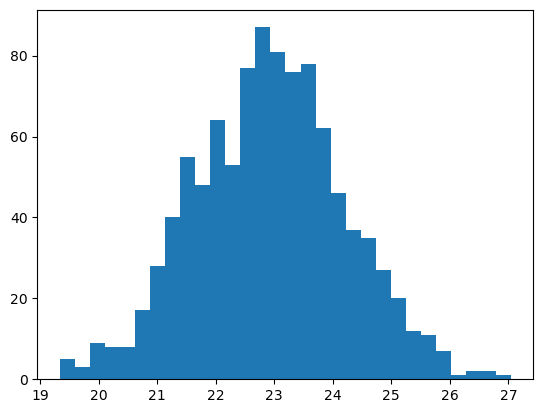

In [32]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=permuted_diffs, opacity=0.5, marker_color='blue', name='Permuted Differences'))
fig.add_shape(type="line", x0=observe_tvd, y0=0, x1=observe_tvd, y1=max(plt.hist(permuted_diffs, bins=30)[0]), line=dict(color="red", width=2))
fig.update_layout(xaxis_title='TVD', yaxis_title='Frequency', title='Distribution of Permuted Differences', showlegend=True)
fig.write_html('assets\Dist_Perm_Diff.html', include_plotlyjs='cdn')


### CUSTOMERS.AFFECTED and OUTAGE_DURATION (MAR)

Null Hypothesis: The missingness of CUSTOMERS.AFFECTED does not depend on OUTAGE_DURATION

Alternative Hypothesis: The missingness of CUSTOMERS.AFFECTED depend on OUTAGE_DURATION

#### Test Statistic

In [33]:
# Compute the observed KS statistic
observed_ks_stat, p_value_ks = ks_2samp(outages1.loc[outages1['CUSTOMERS.AFFECTED'].notna(), 'OUTAGE_DURATION'],
                                         outages1.loc[outages1['CUSTOMERS.AFFECTED'].isna(), 'OUTAGE_DURATION'])

print("Observed KS statistic:", observed_ks_stat)
print("P-value:", p_value_ks)

Observed KS statistic: 0.309633715625278
P-value: 3.239604091385534e-27


#### Permutation Test

In [34]:
import numpy as np



n_permutations = 1000
permuted_ks_stats = []

for _ in range(n_permutations):
    # Shuffle the 'OUTAGE_DURATION' data
    shuffled_outage_duration = np.random.permutation(outages1['OUTAGE_DURATION'])

    # Compute KS statistic for shuffled data
    permuted_ks_stat, _ = ks_2samp(shuffled_outage_duration[outages1['CUSTOMERS.AFFECTED'].notna()],
                                    shuffled_outage_duration[outages1['CUSTOMERS.AFFECTED'].isna()])

    permuted_ks_stats.append(permuted_ks_stat)

permuted_ks_stats = np.array(permuted_ks_stats)

# Compute p-value
p_value_permutation = np.sum(permuted_ks_stats >= observed_ks_stat) / n_permutations

print("Permutation test p-value:", p_value_permutation)


Permutation test p-value: 0.0


Below is the graph and the output of permutation test. Our p-value is less than our significance level of 5%, so we reject the null hypothesis. The significance of this is that it is highly possible that the missingness of Customer Affected depends on outage duration.


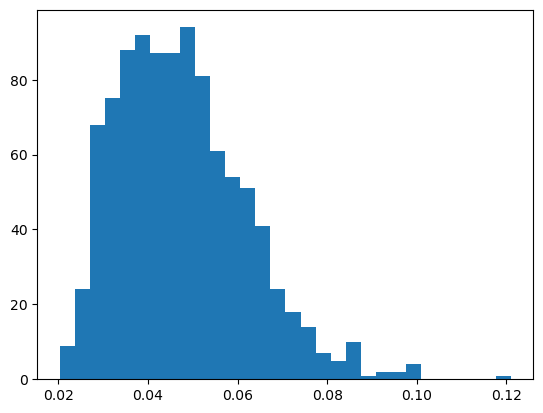

In [35]:
fig = go.Figure(data=[go.Histogram(x=permuted_ks_stats, nbinsx=30, marker_color='skyblue', opacity=0.7)])

# Calculate the x position of the p-value
p_value_x_position = np.percentile(permuted_ks_stats, 100 * (1 - p_value_permutation))

# Add red line at the position of the p-value
fig.add_shape(type='line', x0=p_value_x_position, y0=0, x1=p_value_x_position, y1=max(plt.hist(permuted_ks_stats, bins=30)[0]), 
              line=dict(color='red', width=1), name='P-value')

fig.update_layout(title='Distribution of Permuted KS Statistics',
                  xaxis_title='KS Statistic',
                  yaxis_title='Frequency',
                  showlegend=True)

fig.write_html('assets\permuted_ks_stats_distribution_with_p_value.html', include_plotlyjs='cdn')

## Step 4: Hypothesis Testing

In [36]:
outages1.loc[:, "RES.PRICE"] = pd.to_numeric(outages1["RES.PRICE"])

In [37]:
res_price_mean = outages1["RES.PRICE"].mean()
res_price_mean

11.96837301587301

### DEFINING THE HYPOTHESIS

Null Hypothesis: The mean duration of power outages in areas with a RES.PRICE > 11.5 are the same as the mean duration of power outages in areas witha. RES.pRICE <= 11.5. 

Alternative Hypothesis: The mean duration of power outages in areas with a RES.PRICE > 11.5 are different than the mean duration of power outages in areas witha. RES.pRICE <= 11.5. 

In [38]:
#make a new columned called "RES.PRICE < 11.5" where the values are either true and false
#this way we can group the RES.PRICE column into either of those groups for our permutation test.


outages1["RES.PRICE <= 11.5"] = outages1["RES.PRICE"] <= 11.5
outages1["RES.PRICE <= 11.5"].value_counts()

False    775
True     759
Name: RES.PRICE <= 11.5, dtype: int64

In [39]:
#How many residential areas are in each group and what is the mean ANOMALY.LEVEL in each group?

outages1.loc[:, "ANOMALY.LEVEL"] = pd.to_numeric(outages1["ANOMALY.LEVEL"])

outages1.groupby("RES.PRICE <= 11.5")["ANOMALY.LEVEL"].agg(["mean","count"])

,mean,count
RES.PRICE <= 11.5,,
False,-0.105744,766
True,-0.087879,759


Let's visualize the distribution of anomaly.levels in places with a res.price <= 11.5 and places with a res.price > 11.5

In [40]:
#Visualize the distribution of ANOMALY.LEVELS across both groups

anomalies = outages1[["RES.PRICE <= 11.5", "ANOMALY.LEVEL"]]

fig = px.histogram(anomalies, color='RES.PRICE <= 11.5', histnorm='probability', marginal='box', 
                   title="ANOMALY.LEVEL by RES.PRICE groups", barmode='overlay', opacity=0.7)
fig.write_html('assets\Anomaly.html', include_plotlyjs='cdn')
fig.show()

From this distribution above, its difficulat to tell whether or not there is a difference between the two groups.

### Test Statistic Calculations

Before we begin our permuation test, let's see what our observed statistic is. For the sake of our hypothesis testing, we will be using the difference in grouped means.

In [41]:
#the test statistic that we are going to be using is the difference in group means
anomaly_mean = anomalies["ANOMALY.LEVEL"].mean()

#we cant impute the mean because that might skew either group and make the two distributions look more similiar
anomalies.dropna()

grouped_means = anomalies.groupby("RES.PRICE <= 11.5")["ANOMALY.LEVEL"].mean()
grouped_means

RES.PRICE <= 11.5
False   -0.105744
True    -0.087879
Name: ANOMALY.LEVEL, dtype: float64

In [42]:
#what is our observed statistic?

grouped_means.diff().iloc[1]

0.017865337447582882

Our observed difference in grouped means is 0.01786

### Permutation Test

Now that we've calculated our observed statistic. Let' begin our comparison of these two samples by doing a permutation test. In order to do this test, we are goingt o be randomly shuffling around the values of ANOMALY.LEVEL. We are not shuffling around the RES.PRICE groups so that we can still groupby the "RES.PRICE" later on in our loop.

Once again, the question that we are trying to answer is that how likely is it that one random shuffle gives us a difference in grouped means (RES.PRICE <= 11.5 & RES.PRICE > 11.5) of 0.01786?

In [43]:
#shuffle the ANOMALY.LEVEL COLUMNS FIRST
with_shuffled = anomalies.assign(Shuffled_anomaly=np.random.permutation(outages1['ANOMALY.LEVEL']))
group_means = with_shuffled.groupby('RES.PRICE <= 11.5').mean()
group_means

,ANOMALY.LEVEL,Shuffled_anomaly
RES.PRICE <= 11.5,,
False,-0.105744,-0.081088
True,-0.087879,-0.113015


In [44]:
#begin running the permutation test by shuffling the anomaly.level

n_repetitions = 500

differences = []
for i in range(n_repetitions):
    
    with_shuffled = anomalies.assign(Shuffled_anomaly=np.random.permutation(anomalies['ANOMALY.LEVEL']))

    # Step 2: Compute the test statistic.
    # Remember, False (0) comes before True (1),
    # so this computes True - False.
    grouped_means = (
        with_shuffled
        .groupby('RES.PRICE <= 11.5')
        .mean()
        .loc[:, 'Shuffled_anomaly']
    )
    difference = grouped_means.diff().iloc[-1]
    
    # Step 4: Store the result
    differences.append(difference)
    
differences[:10]

[0.043607121355465725,
 0.0491451859293716,
 0.01632579341188614,
 0.03678678936957082,
 0.03362987732298525,
 0.017366400396309364,
 0.004250693197377198,
 0.003996731745076115,
 -0.021178358740414266,
 -0.03454988336808207]

In [45]:
#heres the observed statistic once again
grouped_means = anomalies.groupby("RES.PRICE <= 11.5")["ANOMALY.LEVEL"].mean()
observed_difference = grouped_means.diff().iloc[1]
observed_difference

0.017865337447582882

### Conclusion

After permutating and shuffling the groups 500 times. We have our observed statistic as well as our simulated difference. By plotting a histogram of the simulated differences against the actauly observed statistic we can answer our question from before.

In [46]:
fig = px.histogram(
    pd.DataFrame(differences), x=0, nbins=50, histnorm='probability', 
    title='Empirical Distribution of the Mean Differences <br> in ANOMALY.LEVELS (RES.PRICE <= 11.5 & RES.PRICE > 11.5)')
fig.add_vline(x=observed_difference, line_color='red')
fig.update_layout(xaxis_range=[-0.2, 0.2], margin=dict(t=60))
fig.write_html('assets\Mean_Anomaly.html', include_plotlyjs='cdn')


Under the null hypothesis, we can regularly see a difference like 0.01786. Therefore we fail to reject the null hypothesis that these two groups come the same distribution. The difference between the two samples is not statistically significant. 

## Step 5: Framing a Prediction Problem

In [47]:
outages1.head()

,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,OUTAGE.START.DATE,OUTAGE.START.TIME,...,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND,RES.PRICE <= 11.5
6,2011,7,Minnesota,MN,MRO,East North Central,-0.3,normal,"Friday, July 1, 2011",5:00:00 PM,...,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983,False
7,2014,5,Minnesota,MN,MRO,East North Central,-0.1,normal,"Sunday, May 11, 2014",6:38:00 PM,...,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983,False
8,2010,10,Minnesota,MN,MRO,East North Central,-1.5,cold,"Tuesday, October 26, 2010",8:00:00 PM,...,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983,True
9,2012,6,Minnesota,MN,MRO,East North Central,-0.1,normal,"Tuesday, June 19, 2012",4:30:00 AM,...,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983,False
10,2015,7,Minnesota,MN,MRO,East North Central,1.2,warm,"Saturday, July 18, 2015",2:00:00 AM,...,15.28,2279,1700.5,18.2,2.14,0.6,91.59266587,8.407334131,5.478742983,False


Notebook: We want to predict the duration of a power outages based on the following features: “RES.PRICE”, “IND.PRICE”, “CLIMATE.REGION”, “CLIMATE.CATEGORY”, “COM.PRICE”.

These are the features that we are going to be using because these are the only features that we can be sure of before the power outage itself. Other factors like “CUSTOMERS.AFFECTED” wouldnt be known to us before the start of the power outage. Thus, these features are going to be the ones we’re training our Regression model on. 

To recap, our response variable is going to be “OUTAGE.DURATION” and our features that we are going to be using are “RES.PRICE”, “IND.PRICE”, “CLIMATE.REGION”, “CLIMATE.CATEGORY”, “COM.PRICE”, . The metric that we are going to be using to determine the accuracy of our model is the RMSE as well as the R^2. 


## Step 6: Baseline Model

As stated before, we are going to be running a Multi-Linear Regression model, lets begin trianing that model.

In [48]:
linear_outages_filled = linear_outages1.copy()
linear_outages_filled.head()

,RES.PRICE,CLIMATE.REGION,COM.PRICE,OUTAGE_DURATION,PI.UTIL.OFUSA,CUSTOMERS.AFFECTED
0,11.6,East North Central,9.18,3060.0,2.2,70000.0
1,12.12,East North Central,9.71,1.0,2.2,0.0
2,10.87,East North Central,8.19,3000.0,2.1,70000.0
3,11.79,East North Central,9.25,2550.0,2.2,68200.0
4,13.07,East North Central,10.16,1740.0,2.2,250000.0


Make a subset of outages1 with all the relevant features for our linear regression model. This will also help us with the tranformation of necessary columns so that we can run the Multi Linear Regression on it. 

In [49]:
types = linear_outages_filled.dtypes
types

RES.PRICE              object
CLIMATE.REGION         object
COM.PRICE              object
OUTAGE_DURATION       float64
PI.UTIL.OFUSA          object
CUSTOMERS.AFFECTED    float64
dtype: object

In [50]:
#linear_outages_filled["CUSTOMERS.AFFECTED"].isna().value_counts()

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
X = linear_outages_filled[['RES.PRICE','CLIMATE.REGION','PI.UTIL.OFUSA','OUTAGE_DURATION']]
y = linear_outages_filled['CUSTOMERS.AFFECTED']

one_hot_encoder = ColumnTransformer(
    transformers=[
    ("onehot", OneHotEncoder(drop='first'), ['CLIMATE.REGION']),
    ('transform', FunctionTransformer(lambda x: x.astype(float)), ['RES.PRICE','PI.UTIL.OFUSA','OUTAGE_DURATION']),
    ('STD', StandardScaler(),['RES.PRICE','PI.UTIL.OFUSA','OUTAGE_DURATION'])
],
    remainder="passthrough"
)
pipeline = Pipeline([
    ('one_hot_encoder', one_hot_encoder),
    ('linear',LinearRegression())
])
pipeline

Pipeline(steps=[('one_hot_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['CLIMATE.REGION']),
                                                 ('transform',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000029DE2FB6F70>),
                                                  ['RES.PRICE', 'PI.UTIL.OFUSA',
                                                   'OUTAGE_DURATION']),
                                                 ('STD', StandardScaler(),
                                                  ['RES.PRICE', 'PI.UTIL.OFUSA',
                                                   'OUTAGE_DURATION'])])),
                ('linear', LinearRegression())])

In [52]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('one_hot_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['CLIMATE.REGION']),
                                                 ('transform',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000029DE2FB6F70>),
                                                  ['RES.PRICE', 'PI.UTIL.OFUSA',
                                                   'OUTAGE_DURATION']),
                                                 ('STD', StandardScaler(),
                                                  ['RES.PRICE', 'PI.UTIL.OFUSA',
                                                   'OUTAGE_DURATION'])])),
                ('linear', LinearRegression())])

Training Data

In [53]:
y_pred = pipeline.predict(X_test)
#R^2
r_squared = r2_score(y_test, y_pred)
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred,squared=False)

# Calculate root mean squared error
print("Root Mean Squared Error (RMSE):", mse)
print("R^2:", r_squared)

Root Mean Squared Error (RMSE): 268057.39231805614
R^2: 0.03862863436464581


Our intial model isnt very accurate at all. The RMSE is incredible high and the r^2 is incredible low. We have to make lots of adjustments going into our final model.



In [54]:
linear_regression_model = pipeline.named_steps['linear']
linear_coefficients = linear_regression_model.coef_
linear_regression_model.intercept_

160347.81742275186

In [55]:
r21 = pipeline.score(X_test, y_test)
r21

0.03862863436464581

## Step 7: Final Model

In [56]:
X_train_transformed = pipeline.named_steps['one_hot_encoder'].transform(X_train)


In [57]:
pipeline.named_steps['linear'].get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "fit_intercept": [True, False],
    "positive":[True, False],
    "copy_X":[True, False]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train)
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [59]:
from sklearn.preprocessing import QuantileTransformer
#make new pipeline with the optimal hyperparamters
one_hot_encoder1 = ColumnTransformer(
    transformers=[
    ('transform', FunctionTransformer(lambda x: x.astype(float)), ['RES.PRICE','PI.UTIL.OFUSA','OUTAGE_DURATION']),
    ('STD', StandardScaler(),['OUTAGE_DURATION']),
    ('quantile', QuantileTransformer(), ['OUTAGE_DURATION'])
],
    remainder="passthrough"
)
pipeline1 = Pipeline([
    ('one_hot_encoder', one_hot_encoder1),
    ('linear',LinearRegression(**grid_search.best_params_))
])
pipeline1

Pipeline(steps=[('one_hot_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transform',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000029DE29211F0>),
                                                  ['RES.PRICE', 'PI.UTIL.OFUSA',
                                                   'OUTAGE_DURATION']),
                                                 ('STD', StandardScaler(),
                                                  ['OUTAGE_DURATION']),
                                                 ('quantile',
                                                  QuantileTransformer(),
                                                  ['OUTAGE_DURATION'])])),
                ('linear', LinearRegression())])

In [60]:
X = linear_outages_filled[['RES.PRICE','PI.UTIL.OFUSA','OUTAGE_DURATION']]
y = linear_outages_filled['CUSTOMERS.AFFECTED']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on training data
pipeline1.fit(X_train1, y_train1)

Pipeline(steps=[('one_hot_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transform',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000029DE29211F0>),
                                                  ['RES.PRICE', 'PI.UTIL.OFUSA',
                                                   'OUTAGE_DURATION']),
                                                 ('STD', StandardScaler(),
                                                  ['OUTAGE_DURATION']),
                                                 ('quantile',
                                                  QuantileTransformer(),
                                                  ['OUTAGE_DURATION'])])),
                ('linear', LinearRegression())])

In [61]:
y_pred1 = pipeline1.predict(X_test1)
#R^2
r_squared = r2_score(y_test1, y_pred)
# Calculate mean squared error
mse = mean_squared_error(y_test1, y_pred,squared=False)

# Calculate root mean squared error
print("Root Mean Squared Error (RMSE):", mse)
print("R^2:", r_squared)

Root Mean Squared Error (RMSE): 268057.39231805614
R^2: 0.03862863436464581


In [62]:
r2=pipeline1.score(X_test1, y_test1)
r2

0.08372266019819119

In [63]:
linear_outages1


,RES.PRICE,CLIMATE.REGION,COM.PRICE,OUTAGE_DURATION,PI.UTIL.OFUSA,CUSTOMERS.AFFECTED
0,11.6,East North Central,9.18,3060.000000,2.2,70000.0
1,12.12,East North Central,9.71,1.000000,2.2,0.0
2,10.87,East North Central,8.19,3000.000000,2.1,70000.0
3,11.79,East North Central,9.25,2550.000000,2.2,68200.0
4,13.07,East North Central,10.16,1740.000000,2.2,250000.0
...,...,...,...,...,...,...
1526,9.8,Northwest,7.66,2771.879828,0.4,0.0
1527,9.8,Northwest,7.66,2771.879828,0.4,0.0
1529,8.41,West North Central,7.8,720.000000,0.5,34500.0
1531,9.25,West North Central,7.47,59.000000,0.3,62000.0


## Step 8: Fairness Analysis

Because we used a regression model we are going to be comparing the r^2 value that we got in our baseline model to the r^2 value that we got in the Final Model.

The permutation test question that we have is: "Is the r^2 score that we got in the final model significantly greater than the r^2 score that we got from our baseline model?

Null Hypothesis: The r^2 scores that we got from both models are approxiamtely the same.

Alternative Hypthesis: The r^2 score that we got from our Final Model is signficantly greater than the r^2 score that we got from our Baseline Model.

In [64]:
observed_difference = r2 - r21

# Combine the data
combined_data = np.column_stack((y_pred1, y_pred, np.array(y_test.values.tolist())))


# Number of permutations
num_permutations = 1000

permutation_differences = []

# Permutation test
for i in range(num_permutations):
    np.random.shuffle(combined_data[:, 0])  # Shuffle only the first column (predictions of final model)
    np.random.shuffle(combined_data[:, 1])  # Shuffle only the second column (predictions of baseline model)
    r2_final_model_permuted = r2_score(combined_data[:, 0], combined_data[:, 2])
    r2_baseline_model_permuted = r2_score(combined_data[:, 1], combined_data[:, 2])
    
    permutation_differences.append(r2_final_model_permuted - r2_baseline_model_permuted)

# Compute p-value
p_value = np.sum(permutation_differences >= observed_difference) / num_permutations
p_value


0.996

Because we got a p-value of 0.784, we have singificant evidence that we can reject our null. Thus, we can accept the alternative hypothesis that our r^2 score that we got from our final model is higher than the r^2 score we got from the baseline model. 